### 💰 Investment Decision Metrics: Definitions and Applications

When evaluating engineering or financial projects, we often compare **initial costs** with **future benefits**. The following tools help quantify profitability, efficiency, and timing of returns.

---

### 📊 Key Metrics for Investment Evaluation

| Metric                     | Definition                                                                 | Interpretation                                                                 |
|----------------------------|-----------------------------------------------------------------------------|--------------------------------------------------------------------------------|
| **Benefit/Cost Ratio (BCR)** | $$ \text{BCR} = \frac{\text{Present Value of Benefits}}{\text{Present Value of Costs}} $$ | BCR > 1 indicates a profitable investment                                      |
| **Payback Period**         | Time required to recover initial investment from net cash flows            | Shorter payback = quicker recovery; ignores time value of money               |
| **Net Present Value (NPV)** | $$ \text{NPV} = \sum \frac{B_t - C_t}{(1 + r)^t} $$                        | Total value added by project; NPV > 0 is desirable                            |
| **Discounted Cash Flow (DCF)** | Present value of future cash flows discounted at a chosen rate         | Captures time value of money; used in NPV and IRR calculations                |
| **Internal Rate of Return (IRR)** | Discount rate that makes NPV = 0                                     | IRR > required rate of return → acceptable investment                         |
| **Opportunity Cost**       | Value of the best alternative foregone when a decision is made             | Helps assess trade-offs and hidden costs of choosing one option over another  |

---

### 🧠 Interpretation Guidelines

- **BCR > 1**: Benefits outweigh costs → project is economically viable  
- **NPV > 0**: Investment adds value → accept the project  
- **IRR > discount rate**: Return exceeds cost of capital → favorable  
- **Payback period < project horizon**: Investment recovers in time  
- **Opportunity cost**: Critical for comparing mutually exclusive options  

---

### 🧪 Use Cases

| Scenario                          | Recommended Metric(s)                     |
|----------------------------------|-------------------------------------------|
| Public infrastructure projects   | BCR, NPV, IRR                              |
| Startup or R&D investment        | IRR, Payback Period, Opportunity Cost      |
| Environmental or social impact   | NPV, BCR (with externalities included)     |
| Capital budgeting                | NPV, DCF, IRR                              |


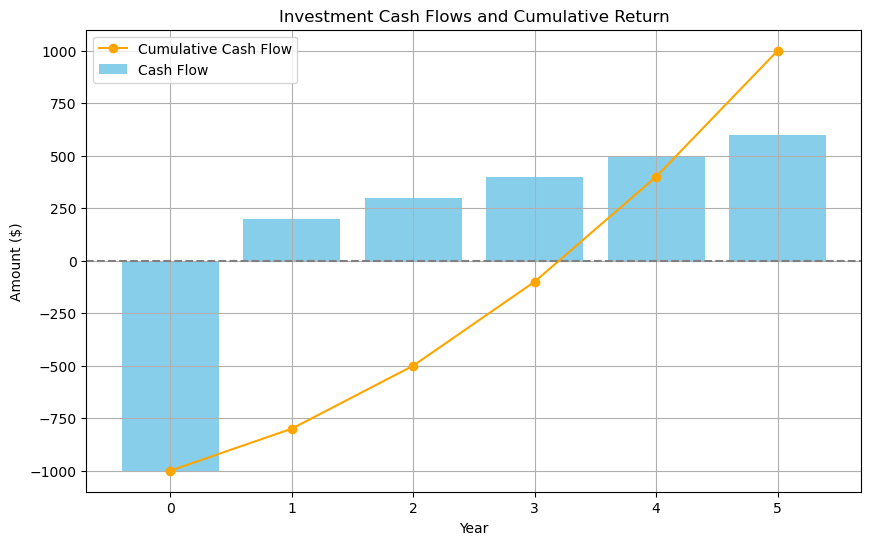

Net Present Value (NPV): $535.78
Benefit/Cost Ratio (BCR): 1.54
Payback Period: 4 years
Internal Rate of Return (IRR): 23.29%


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton
import ipywidgets as widgets
from IPython.display import display, clear_output

# Widget to set number of years
years_slider = widgets.IntSlider(value=6, min=1, max=20, step=1, description='Years:')

# Discount rate slider
discount_slider = widgets.FloatSlider(value=0.08, min=0.01, max=0.2, step=0.01, description='Discount Rate:')

# Button to trigger calculation
run_button = widgets.Button(description='Calculate Metrics')

# Function to generate cash flow inputs
def generate_cashflow_inputs(n_years):
    default_values = [-1000] + [200] * (n_years - 1)
    return [widgets.FloatText(value=default_values[i], description=f'Year {i}') for i in range(n_years)]

# Container for dynamic cash flow widgets
cashflow_box = widgets.VBox()

# Update cash flow inputs when number of years changes
def update_cashflows(change):
    cashflow_box.children = generate_cashflow_inputs(change['new'])

years_slider.observe(update_cashflows, names='value')
update_cashflows({'new': years_slider.value})  # Initial setup

# Main calculation and visualization function
def calculate_metrics(b):
    clear_output(wait=True)
    display(years_slider, discount_slider, cashflow_box, run_button)
    
    cash_flows = [cf.value for cf in cashflow_box.children]
    years = np.arange(len(cash_flows))
    r = discount_slider.value

    # NPV
    npv = sum(cf / (1 + r)**t for t, cf in enumerate(cash_flows))

    # BCR
    present_benefits = sum(cf / (1 + r)**t for t, cf in enumerate(cash_flows) if cf > 0)
    present_costs = -cash_flows[0]
    bcr = present_benefits / present_costs if present_costs != 0 else np.nan

    # Payback Period
    cumulative_cash = np.cumsum(cash_flows)
    payback_period = next((i for i, val in enumerate(cumulative_cash) if val >= 0), None)

    # IRR
    def npv_func(rate):
        return sum(cf / (1 + rate)**t for t, cf in enumerate(cash_flows))
    try:
        irr = newton(npv_func, x0=0.1)
    except RuntimeError:
        irr = np.nan

    # Plot
    plt.figure(figsize=(10, 6))
    plt.bar(years, cash_flows, color='skyblue', label='Cash Flow')
    plt.plot(years, cumulative_cash, color='orange', marker='o', label='Cumulative Cash Flow')
    plt.axhline(0, color='gray', linestyle='--')
    plt.title('Investment Cash Flows and Cumulative Return')
    plt.xlabel('Year')
    plt.ylabel('Amount ($)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Output metrics
    print(f"📌 Net Present Value (NPV): ${npv:.2f}")
    print(f"📌 Benefit/Cost Ratio (BCR): {bcr:.2f}")
    print(f"📌 Payback Period: {payback_period} years")
    print(f"📌 Internal Rate of Return (IRR): {irr:.2%}" if not np.isnan(irr) else "📌 IRR: Could not be computed")

# Bind button
run_button.on_click(calculate_metrics)

# Initial display
display(years_slider, discount_slider, cashflow_box, run_button)


### 📘 What This Code Does: Present Value Calculations for Investment Planning

This Python code calculates how much money you need to invest today to meet two future financial goals:

---

### 🎯 1. **Future Value Target**
- **Goal:** Receive a lump sum of \$10,000 in 10 years.
- **Interest Rate:** 5% annually.
- **Calculation:**  
  Uses the **present value formula** for a single future amount:
  $$
  PV = \frac{FV}{(1 + r)^n}
  $$
  Where:
  - \( FV \): Future value (\$10,000)
  - \( r \): Annual interest rate (5%)
  - \( n \): Number of years (10)

- **Result:** Displays how much you must deposit today to reach that goal.

---

### 💵 2. **Monthly Annuity Target**
- **Goal:** Receive \$200 per month for 10 years.
- **Interest Rate:** 5% annually (converted to monthly).
- **Calculation:**  
  Uses the **present value of an annuity formula**:
  $$
  PV = PMT \times \left( \frac{1 - (1 + r)^{-n}}{r} \right)
  $$
  Where:
  - \( PMT \): Monthly payment (\$200)
  - \( r \): Monthly interest rate (5% ÷ 12)
  - \( n \): Total number of months (10 × 12)

- **Result:** Displays how much you must deposit today to fund the monthly payments.

---

### 🧮 Display
Both results are shown using formatted Markdown with embedded LaTeX equations for clarity and instructional value.

This code is ideal for teaching the difference between lump-sum and annuity-based investment planning, and how time and interest rates affect present value.


In [6]:
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output, Markdown

# Widgets
mode_selector = widgets.Dropdown(
    options=['Future Value Target', 'Monthly Annuity Target'],
    value='Future Value Target',
    description='Goal Type:'
)

future_value_input = widgets.FloatText(value=10000, description='Target Amount ($):')
monthly_payment_input = widgets.FloatText(value=500, description='Monthly Payment ($):')
years_input = widgets.IntSlider(value=5, min=1, max=30, description='Years:')
rate_input = widgets.FloatSlider(value=0.05, min=0.01, max=0.15, step=0.005, description='Annual Rate:')
run_button = widgets.Button(description='Calculate Investment')
output_box = widgets.Output()
input_box = widgets.VBox()

# Update visible inputs based on goal type
def update_inputs(change=None):
    if mode_selector.value == 'Future Value Target':
        input_box.children = [future_value_input, years_input, rate_input, run_button, output_box]
    elif mode_selector.value == 'Monthly Annuity Target':
        input_box.children = [monthly_payment_input, years_input, rate_input, run_button, output_box]

mode_selector.observe(update_inputs, names='value')
update_inputs()

# Calculation and interpretation
def calculate_investment(b):
    output_box.clear_output()
    with output_box:
        r = rate_input.value
        n_years = years_input.value
        n_months = n_years * 12
        monthly_rate = r / 12

        if mode_selector.value == 'Future Value Target':
            FV = future_value_input.value
            PV = FV / (1 + r)**n_years
            display(Markdown(rf"""
### 🎯 Future Value Target
To receive **${FV:,.2f}** in **{n_years} years** at an annual interest rate of **{r:.2%}**,  
you must deposit **${PV:,.2f}** today.

**Formula Used:**  
$$ PV = \frac{{FV}}{{(1 + r)^n}} $$  
Where:  
- \( FV \): Future value  
- \( r \): Annual interest rate  
- \( n \): Number of years  
"""))

        elif mode_selector.value == 'Monthly Annuity Target':
            PMT = monthly_payment_input.value
            PV_annuity = PMT * (1 - (1 + monthly_rate)**-n_months) / monthly_rate
            display(Markdown(rf"""
### 💵 Monthly Annuity Target
To receive **${PMT:,.2f} per month** for **{n_years} years** at an annual interest rate of **{r:.2%}**,  
you must deposit **${PV_annuity:,.2f}** today.

**Formula Used:**  
$$ PV = PMT \times \left( \frac{{1 - (1 + r)^{-n}}}{r} \right) $$  
Where:  
- \( PMT \): Monthly payment  
- \( r \): Monthly interest rate  
- \( n \): Number of months  
"""))

# Bind button
run_button.on_click(calculate_investment)

# Display
display(Markdown("## 🧮 Investment Calculator with Interpretation"))
display(mode_selector, input_box)


## 🧮 Investment Calculator with Interpretation

Dropdown(description='Goal Type:', options=('Future Value Target', 'Monthly Annuity Target'), value='Future Va…

### 🧮 Mortgage Calculator with Widgets and Visualization

This interactive Python tool calculates monthly mortgage payments and visualizes the breakdown of principal vs. interest over time.

---

### 🔧 Components

User inputs are collected via interactive widgets:

- **Loan Amount ($)**
- **Term (Years)**
- **Annual Interest Rate**
- **Calculate Mortgage** button

---

### 📊 Functionality

The monthly mortgage payment is computed using the standard amortization formula:

$$
M = P \cdot \frac{r(1 + r)^n}{(1 + r)^n - 1}
$$

Where:
- \( P \): Loan amount  
- \( r \): Monthly interest rate  
- \( n \): Total number of payments (months)

The output includes:
- Loan details
- Monthly payment amount

---

### 📈 Visualization

A plot shows the monthly breakdown of:
- **Principal paid**
- **Interest paid**

This helps users understand how payments shift over time.

---

### 🖱️ Interaction

Clicking the **Calculate Mortgage** button triggers the computation and updates the output and plot dynamically.


In [9]:
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

# Widgets
loan_amount = widgets.FloatText(value=300000, description='Loan Amount ($):')
loan_years = widgets.IntSlider(value=30, min=1, max=40, description='Term (Years):')
interest_rate = widgets.FloatSlider(value=0.05, min=0.01, max=0.15, step=0.005, description='Annual Rate:')
run_button = widgets.Button(description='Calculate Mortgage')
output_box = widgets.Output()

# Mortgage calculation function
def calculate_mortgage(b):
    output_box.clear_output()
    with output_box:
        P = loan_amount.value
        r_annual = interest_rate.value
        n_years = loan_years.value
        n_months = n_years * 12
        r_monthly = r_annual / 12

        # Monthly payment formula
        M = P * r_monthly * (1 + r_monthly)**n_months / ((1 + r_monthly)**n_months - 1)

        print(f"🏠 Loan Amount: ${P:,.2f}")
        print(f"📆 Term: {n_years} years ({n_months} months)")
        print(f"📈 Interest Rate: {r_annual:.2%} annually")
        print(f"💵 Monthly Payment: ${M:,.2f}")

        # Optional: Amortization breakdown
        balance = P
        principal_paid = []
        interest_paid = []
        for _ in range(n_months):
            interest = balance * r_monthly
            principal = M - interest
            balance -= principal
            principal_paid.append(principal)
            interest_paid.append(interest)

        plt.figure(figsize=(10, 5))
        plt.plot(principal_paid, label='Principal', color='green')
        plt.plot(interest_paid, label='Interest', color='red')
        plt.title('Monthly Payment Breakdown')
        plt.xlabel('Month')
        plt.ylabel('Amount ($)')
        plt.legend()
        plt.grid(True)
        plt.show()

# Bind button
run_button.on_click(calculate_mortgage)

# Display
display(loan_amount, loan_years, interest_rate, run_button, output_box)


FloatText(value=300000.0, description='Loan Amount ($):')

IntSlider(value=30, description='Term (Years):', max=40, min=1)

FloatSlider(value=0.05, description='Annual Rate:', max=0.15, min=0.01, step=0.005)

Button(description='Calculate Mortgage', style=ButtonStyle())

Output()